**Question 1**: Data.

In this section our test data are split up into labels and images. The images are first tried for resizing, and only passing the image if there is an error. The data is then split into 75% training and 25% validation test split. And finally a bar graph is shown visualizing the amount of images athat are dogs and that are cats.


In [0]:
!unzip data-lab3.zip

Using TensorFlow backend.


OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion faile

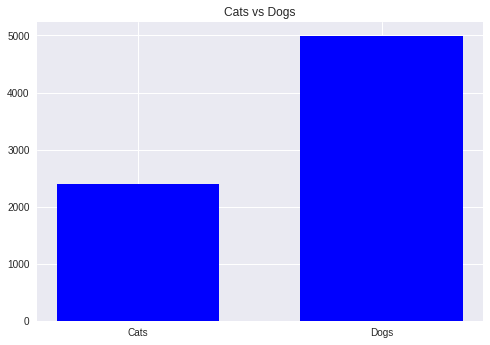

In [0]:
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split

import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

img_width = 150
img_height = 150
TRAIN_DIR_CAT = 'data-lab3/cat/'
TRAIN_DIR_DOG = 'data-lab3/dog/'

list_images_cat= [TRAIN_DIR_CAT+i for i in os.listdir(TRAIN_DIR_CAT)]
list_images_dog= [TRAIN_DIR_DOG+i for i in os.listdir(TRAIN_DIR_DOG)]

# Load the images into X and labels into Y.
X = [] # images as arrays
Y = [] # labels

nbr_cats = 0
nbr_dogs = 0

for image in list_images_cat:
  try:
    # The images provided are of varying size - 
    # they will need to be resized prior to feeding them into the model.
    X.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    Y.append(0)
    nbr_cats = nbr_cats + 1
  except Exception as e:
    print(str(e)) 
  
for image in list_images_dog:
  try:
    X.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    Y.append(1)
    nbr_dogs = nbr_dogs + 1
  except Exception as e:
    print(str(e))
     
#print(len(X))
#print(len(Y))

# Train/Test Split: 75% for training, 25% for Val/Test)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.25, random_state=1)

# Display a bar chart to show the number of images in each category, in both the training
# and testing data.
plt.title("Cats vs Dogs")
y = [nbr_cats, nbr_dogs]
x = ['Cats', 'Dogs']
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()

** Question 2**: Classification

The model is first defined as sequential so that we can add multiple layers to it. Then we had multiple layers to the model as requested by the assignment details. The summary of the model is printed out and then the model itself is compiled using the specifications detailed in the assignment. Finally the model is fit with our train and test data.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np

nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 16

model = Sequential()

# Create a neural network using Keras and add at least 3 hidden layers. 
model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

# Use the summary on your Keras model to display a full summary of your model.
model.summary()

# Compile your model using compile from Keras. 
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow(np.array(X_train), Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

# Train your model, using fit from Keras
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5, #set size varies (time contraints)
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_61 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_62 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 64)        18496     
__________

** Question 3**: Evaluation

Predictions are generated and compared to the actual labels using the classification report. Then an roc curve graph is generated to visualize the prediction accuracy. 

In [0]:
#Saving model 
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

In [0]:
validation_generator = val_datagen.flow_from_directory(
    'data-lab3',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary') # try binary

validation_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict_generator(validation_generator, steps=validation_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  

Found 7390 images belonging to 2 classes.


In [0]:
from sklearn.metrics import classification_report

# Use the classification_report from scikit-learn to report precision, recall, and f1-score
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

         cat       0.32      1.00      0.49      2400
         dog       0.00      0.00      0.00      4990

   micro avg       0.32      0.32      0.32      7390
   macro avg       0.16      0.50      0.25      7390
weighted avg       0.11      0.32      0.16      7390



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [0]:
!pip install scikit-plot

In [0]:
from sklearn.metrics import roc_curve


y_pred_keras = model.predict(np.array(X_val))
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_val, y_pred_keras)



In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

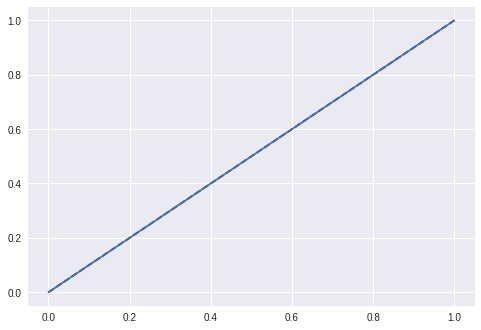

In [0]:
import matplotlib.pyplot as plt

# Visualize your results by displaying a ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))